In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from glob import glob
import os
from os import listdir
import tifffile

In [14]:
folders=glob("*/")
source_file_folders=[]
for directory in folders:
    source_file_folders.append(os.getcwd()+"\\"+directory)

source_file_folders.remove("e:\\MBDS Materials\\BMDSIS\\Data\\Composite Images\\")
source_file_folders

['e:\\MBDS Materials\\BMDSIS\\Data\\20190508-C2GNT1-EGFP-Noc-01\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-C2GNT1-EGFP-Noc-02\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-C2GNT1-EGFP-Noc-03\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-C2GNT1-EGFP-Noc-04\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-C2GNT1-EGFP-Noc-05\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-GALNT4-EGFP-Noc-01\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-GALNT4-EGFP-Noc-02\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-GALNT4-EGFP-Noc-03\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-GALNT4-EGFP-Noc-04\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-GALNT4-EGFP-Noc-05\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-GALNT8-EGFP-Noc-01\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-GALNT8-EGFP-Noc-02\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-GALNT8-EGFP-Noc-03\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-GALNT8-EGFP-Noc-04\\',
 'e:\\MBDS Materials\\BMDSIS\\Data\\20190508-GAL

In [15]:
source_file_folders[2].split("\\")

['e:', 'MBDS Materials', 'BMDSIS', 'Data', '20190508-C2GNT1-EGFP-Noc-03', '']

In [16]:
cy3_suffix="Cy3-I-BGST.tif"
GFP_suffix="GFP-I-BGST.tif"
cy5_suffix="Cy5-I-BGST.tif"

for directory in source_file_folders:

    ## Get the unique label of the images
    words_dir=directory.split("\\")
    label=words_dir[len(words_dir)-2]
    print(label)
    files=[x for x in listdir(directory) if x[len(x)-8:len(x)]=="BGST.tif"]

    ## Get source files
    im_cy3_filename=directory+[x for x in files if x[len(x)-len(cy3_suffix):len(x)]==cy3_suffix][0]
    im_GFP_filename=directory+[x for x in files if x[len(x)-len(GFP_suffix):len(x)]==GFP_suffix][0]
    im_cy5_filename=directory+[x for x in files if x[len(x)-len(cy5_suffix):len(x)]==cy5_suffix][0]

    ## Read source files
    im_cy3=io.imread(im_cy3_filename)
    im_GFP=io.imread(im_GFP_filename)
    im_cy5=io.imread(im_cy5_filename)

    ## Combine source files
    im_our_rgb=np.dstack((im_cy3,im_GFP,im_cy5))

    ## Make Directory & Save files
    new_path=os.getcwd()+"\\Composite Images\\"+label+"-Data Preparation"
    os.mkdir(new_path)
    tifffile.imsave(new_path+"\\composite_"+label+".tif",im_our_rgb)

20190508-C2GNT1-EGFP-Noc-01
20190508-C2GNT1-EGFP-Noc-02
20190508-C2GNT1-EGFP-Noc-03
20190508-C2GNT1-EGFP-Noc-04
20190508-C2GNT1-EGFP-Noc-05
20190508-GALNT4-EGFP-Noc-01
20190508-GALNT4-EGFP-Noc-02
20190508-GALNT4-EGFP-Noc-03
20190508-GALNT4-EGFP-Noc-04
20190508-GALNT4-EGFP-Noc-05
20190508-GALNT8-EGFP-Noc-01
20190508-GALNT8-EGFP-Noc-02
20190508-GALNT8-EGFP-Noc-03
20190508-GALNT8-EGFP-Noc-04
20190508-GALNT8-EGFP-Noc-05
20190508-GALNT8-EGFP-Noc-06
20190508-GALNT8-EGFP-Noc-07
20190508-GALNT8-EGFP-Noc-08
20190508-tetraspeckbeads-aft-01
20190508-tetraspeckbeads-bef-01
20190508-VIP36-EGFP-Noc-01
20190508-VIP36-EGFP-Noc-02
20190508-VIP36-EGFP-Noc-03
20190508-VIP36-EGFP-Noc-04
20190508-VIP36-EGFP-Noc-05
20190508-VIP36-EGFP-Noc-06
20190508-VIP36-EGFP-Noc-07
20190508-VIP36-EGFP-Noc-08
20190823-EGFP-Golph3-Noc-01
20190823-EGFP-Golph3-Noc-02
20190823-EGFP-Golph3-Noc-03
20190823-EGFP-Golph3-Noc-04
20190823-EGFP-Golph3-Noc-05
20190823-EGFP-Golph3-Noc-06
20190823-EGFP-Golph3-Noc-07
20190823-EGFP-Golph3

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


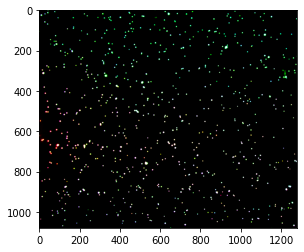

In [17]:
plt.imshow(im_our_rgb)